In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
def plot_cat_history(history, epochs):
    rng = range(epochs)
    plt.figure(figsize=(9, 7))
    plt.plot(rng, history['loss'], label="loss")
    plt.plot(rng, history['sparse_categorical_accuracy'], label="accuracy")
    plt.plot(rng, history['val_loss'], label='val_loss')
    plt.plot(rng, history['val_sparse_categorical_accuracy'], label='val_accuracy')
    plt.legend()

# Vanishing/exploding gradients


### Выбор функции активации и начальной инициализации весов  
RELU: kernel_initializer: "he_uniform", "he_normal"  
SELU: kernel_initializer: "lecun_normal" - стопочная сеть(Не использовать в рекурентных или wide&deep), но можно использовать в свёрточных.  
ELU: лучше Relu, но сходится дольше  


In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_val, X_train = X_train_full[:5000], X_train_full[5000:]
y_val, y_train = y_train_full[:5000], y_train_full[5000:]

4422102/4422102 [==============================] - 0s 0us/step


Epoch 1/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.8270 - sparse_categorical_accuracy: 0.7269 - val_loss: 0.6041 - val_sparse_categorical_accuracy: 0.8062
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5696 - sparse_categorical_accuracy: 0.8095 - val_loss: 0.5264 - val_sparse_categorical_accuracy: 0.8274
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5196 - sparse_categorical_accuracy: 0.8234 - val_loss: 0.4926 - val_sparse_categorical_accuracy: 0.8346
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4934 - sparse_categorical_accuracy: 0.8308 - val_loss: 0.4738 - val_sparse_categorical_accuracy: 0.8412
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4758 - sparse_categorical_accuracy: 0.8366 - val_loss: 0.4591 - val_sparse_categorical_accuracy: 0.8454
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4634 - spars

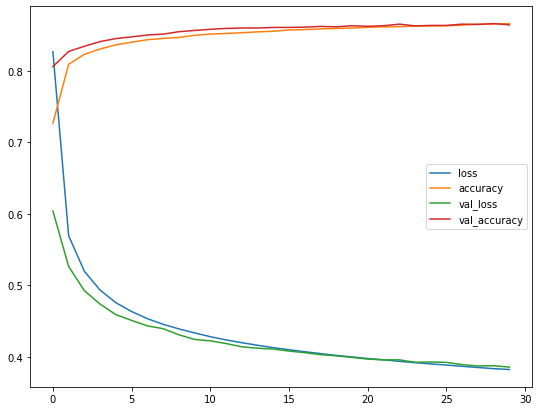

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='elu', kernel_initializer='he_normal'),
    keras.layers.Dense(300, activation='elu', kernel_initializer='he_normal'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=keras.optimizers.Adagrad(),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=keras.metrics.sparse_categorical_accuracy)
hist = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))
plot_cat_history(hist.history, 30)

Epoch 1/30
1719/1719 [==============================] - 37s 19ms/step - loss: 1.3146 - sparse_categorical_accuracy: 0.4833 - val_loss: 0.9214 - val_sparse_categorical_accuracy: 0.6304
Epoch 2/30
1719/1719 [==============================] - 32s 19ms/step - loss: 0.9622 - sparse_categorical_accuracy: 0.6229 - val_loss: 0.8118 - val_sparse_categorical_accuracy: 0.6938
Epoch 3/30
1719/1719 [==============================] - 32s 19ms/step - loss: 0.7237 - sparse_categorical_accuracy: 0.7320 - val_loss: 0.6326 - val_sparse_categorical_accuracy: 0.7714
Epoch 4/30
1719/1719 [==============================] - 34s 20ms/step - loss: 0.6258 - sparse_categorical_accuracy: 0.7691 - val_loss: 0.5886 - val_sparse_categorical_accuracy: 0.7920
Epoch 5/30
1719/1719 [==============================] - 34s 20ms/step - loss: 0.5736 - sparse_categorical_accuracy: 0.7913 - val_loss: 0.5539 - val_sparse_categorical_accuracy: 0.8024
Epoch 6/30
1719/1719 [==============================] - 34s 20ms/step - loss: 0.

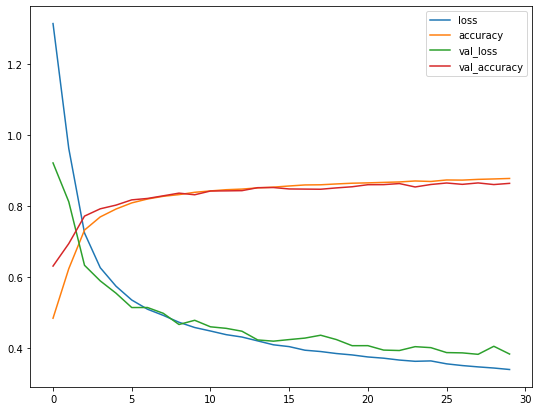

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(optimizer=keras.optimizers.Adagrad(),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=keras.metrics.sparse_categorical_accuracy)
hist = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))
plot_cat_history(hist.history, 30)

# Batch Normalization
Слоям нейронной сети на вход подаются данные, предварительно обработанные и имеющие нулевое математическое ожидание и единичную дисперсию.  
Ведёт себя как регуляризатор, сокращая потребность в других регуляризотарох


Epoch 1/100
1719/1719 [==============================] - 15s 8ms/step - loss: 0.6600 - sparse_categorical_accuracy: 0.7715 - val_loss: 0.4723 - val_sparse_categorical_accuracy: 0.8410
Epoch 2/100
1719/1719 [==============================] - 14s 8ms/step - loss: 0.5009 - sparse_categorical_accuracy: 0.8227 - val_loss: 0.4303 - val_sparse_categorical_accuracy: 0.8554
Epoch 3/100
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4618 - sparse_categorical_accuracy: 0.8389 - val_loss: 0.4120 - val_sparse_categorical_accuracy: 0.8604
Epoch 4/100
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4436 - sparse_categorical_accuracy: 0.8436 - val_loss: 0.3984 - val_sparse_categorical_accuracy: 0.8640
Epoch 5/100
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4282 - sparse_categorical_accuracy: 0.8491 - val_loss: 0.3884 - val_sparse_categorical_accuracy: 0.8664
Epoch 6/100
1719/1719 [==============================] - 14s 8ms/step - loss: 0.

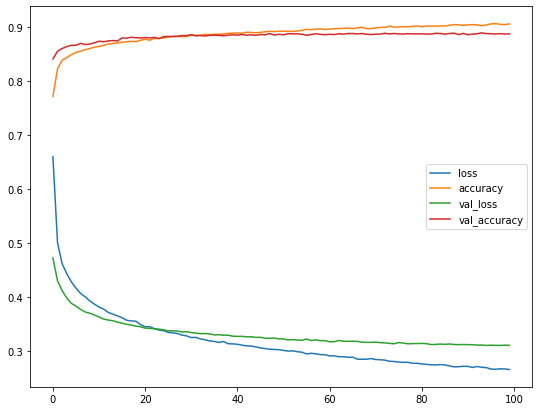

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation='elu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation='elu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=keras.optimizers.Adagrad(),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=keras.metrics.sparse_categorical_accuracy,
              )
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), 
                    callbacks=[keras.callbacks.EarlyStopping(patience=7, restore_best_weights=True)])
plot_cat_history(history.history, 100)

# Gradient Clipping
Усечение градиента - загон градиента в рамки в случае проблемы взрывного роста
установка параметра optimizer.clipvalue в model.compile  

# Transfer learning
Обучение, когда используется начальные слои одной нейронной сети а сверху прикручивается своя. Данные должны быть приведены к формату взятой сети, верхний слой всегда удаляется. Веса взятой модели - фиксируются(не обучаются).